# Creating Synthetic Sales Data

#### This Jupyter Notebook delves into the creation and analysis of synthetic climbing chalk sales data, specifically designed to simulate a one-year period from January 1st, 2015, to January 1st, 2016.

The data is generated using Python code and aims to represent the climbing gear industry. It encompasses five distinct customer profiles, three varied price points for the chalk, and incorporates three different ordering methods. This rich dataset provides a valuable platform for data exploration, analysis, and machine learning tasks relevant to the climbing gear industry.

By analyzing this synthetic data, we can gain valuable insights that might be challenging or expensive to obtain in the real world. This analysis will provide a controlled environment where we can simulate real-world scenarios and explore various aspects of climbing chalk sales.

The analysis will follow these steps:

**Synthetic Data Creation**: We'll begin by generating the synthetic sales data using Python code. This code will simulate a one-year period and incorporate the following elements:

- Five distinct customer profiles representing different purchasing behaviors.
- Three varied price points for the climbing chalk reflecting different product options.
- Three different ordering methods (e.g., online, in-store, phone) used by customers.

**Data Exploration**: We'll examine the structure and content of the synthetic data to ensure it reflects realistic sales patterns. We'll verify the distribution of customer profiles, price points, and ordering methods.

**Customer Cost Distribution**: We'll analyze how cost is distributed across different customer profiles. This will involve creating histograms that visualize the frequency of purchases within various cost ranges for each customer profile.

**Daily Sales Trend**: We'll shift our focus to understanding how sales fluctuate over time. By calculating daily sales and creating a line plot, we'll investigate potential seasonal trends, peak sales periods, or any other patterns in daily sales figures.

**Saving the DataFrame**: Finally, we'll save the processed data as a CSV file for future reference or potential use in other tools. This will ensure easy access to the analyzed data for further exploration or sharing.

Throughout this process, we'll leverage the functionalities of `pandas` (pd) and `matplotlib.pyplot` (plt) libraries for data manipulation and visualization.

By following this structured approach, we'll gain valuable insights into the simulated sales data, allowing us to explore various aspects of the climbing gear industry and potentially use these insights to inform real-world sales strategies or develop machine learning models for sales prediction in this domain.

Let's begin our exploration of this synthetic climbing chalk sales data!

In [1]:
# Import all necessary packages and libraries
import random
from datetime import date, timedelta
import pandas as pd

The initial code sets the stage for simulating customer sales by defining: common first names (`first_names`), a year-long sales period (`start_date` & `end_date`), different chalk prices (`chalk_costs`), and potential purchase channels (`order_type`).

In [2]:
# Define the list of first names
first_names = ["Alice", "Bob", "Charlie", "Diana", "Evan"]

# Define the date range (start and end)
start_date = date(2015, 1, 1)
end_date = date(2016, 1, 1)

# Define the list of chalk bag costs
chalk_costs = [3, 5, 10]

order_type = ["Store", "Online", "Private"]

Following the initial setup, this code segment dives into generating the actual sales data. It defines a function generate_random_date to create random dates within the specified year range. Then, it constructs a dictionary (data) with columns for customer names, sale dates, costs, and sale types. Utilizing a loop, it iterates 100 times to populate the dictionary with random selections from the predefined lists (`first_names`, `chalk_costs`, and `order_type`) and the generated random dates. Finally, it converts the dictionary into a Pandas DataFrame (df) and prints it for initial inspection.

In [3]:
# Define function to generate a random date within the specified range
def generate_random_date(start, end):
  time_between_dates = end - start
  days_since_start = random.randint(0, time_between_dates.days)
  return start + timedelta(days=days_since_start)

# Generate the data as a dictionary
data = {
    "Customer Name": [],
    "Sale Date": [],
    "Cost ($)": [],
    "Sale Type": [],
}

for _ in range(100):
    
  # Pick a random first name
  name = random.choice(first_names)
  
  # Generate a random date within the range
  sale_date = generate_random_date(start_date, end_date)

  # Pick a random chalk bag cost
  cost = random.choice(chalk_costs)

  # Pick a random chalk bag cost
  sale = random.choice(order_type)

  # Add data to the dictionary
  data["Customer Name"].append(name)
  data["Sale Date"].append(sale_date)
  data["Cost ($)"].append(cost)
  data["Sale Type"].append(sale)

# Create the pandas DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df.to_string(index=False))

Customer Name  Sale Date  Cost ($) Sale Type
         Evan 2015-02-24        10    Online
        Diana 2015-10-14         3   Private
          Bob 2015-10-16         3   Private
          Bob 2015-09-14         5     Store
        Diana 2015-03-19        10     Store
        Diana 2015-08-24         3   Private
          Bob 2015-12-19        10     Store
         Evan 2015-06-08         3     Store
         Evan 2015-06-23        10    Online
        Alice 2015-01-19         5     Store
        Alice 2015-09-27        10     Store
         Evan 2015-08-19        10     Store
        Alice 2015-09-22         3   Private
        Diana 2015-01-11         3     Store
         Evan 2015-11-22        10    Online
        Diana 2015-12-06         5   Private
         Evan 2015-01-21         3   Private
        Diana 2015-10-17        10    Online
      Charlie 2015-04-15         3     Store
        Diana 2015-07-27         3   Private
        Diana 2015-09-30         5     Store
      Char

#### Exploring the Dataset
Now that we've generated our synthetic sales data, let's take a look at the first few rows to get a feel for the structure and content. We'll use the df.head() function, which displays the first n (default : 5) rows of the DataFrame. This will give us a quick overview of the features (columns) and the type of data they contain (e.g., customer names, Sales information, and dates). Examining the initial rows helps us identify any potential issues or unexpected values before further analysis.

In [4]:
# Print the df head with 5 rows
df.head()

,Customer Name,Sale Date,Cost ($),Sale Type
0,Evan,2015-02-24,10,Online
1,Diana,2015-10-14,3,Private
2,Bob,2015-10-16,3,Private
3,Bob,2015-09-14,5,Store
4,Diana,2015-03-19,10,Store


We can also look at the descriptive statistics for this dataframe.

In [5]:
# Generate descriptive Statistics for 'Sales Date'
df['Sale Date'].describe()

count            100
unique            90
top       2015-06-03
freq               3
Name: Sale Date, dtype: object

In [6]:
# Generate descriptive Statistics for 'Customer Name'
df['Customer Name'].describe()

count       100
unique        5
top       Diana
freq         24
Name: Customer Name, dtype: object

#### Customer Cost Distribution Analysis

Now that we have explored the general characteristics of our data, let's delve deeper and analyze how cost is distributed across different customers. This analysis will help us understand if there are any significant variations in spending patterns among customer groups.

To achieve this, we'll create a series of histograms that visualize the distribution of customer costs. Each histogram will represent the cost frequency for a single customer. We'll utilize a subplot grid layout to efficiently display multiple histograms on a single page. By examining these histograms, we can identify trends or patterns in customer spending behavior. For instance, we might observe some customers consistently making high-value purchases, while others might have a more even spread across different cost ranges. The following code snippet implements this analysis. It iterates through unique customer names, filters the data for each customer, and creates a corresponding cost distribution histogram.

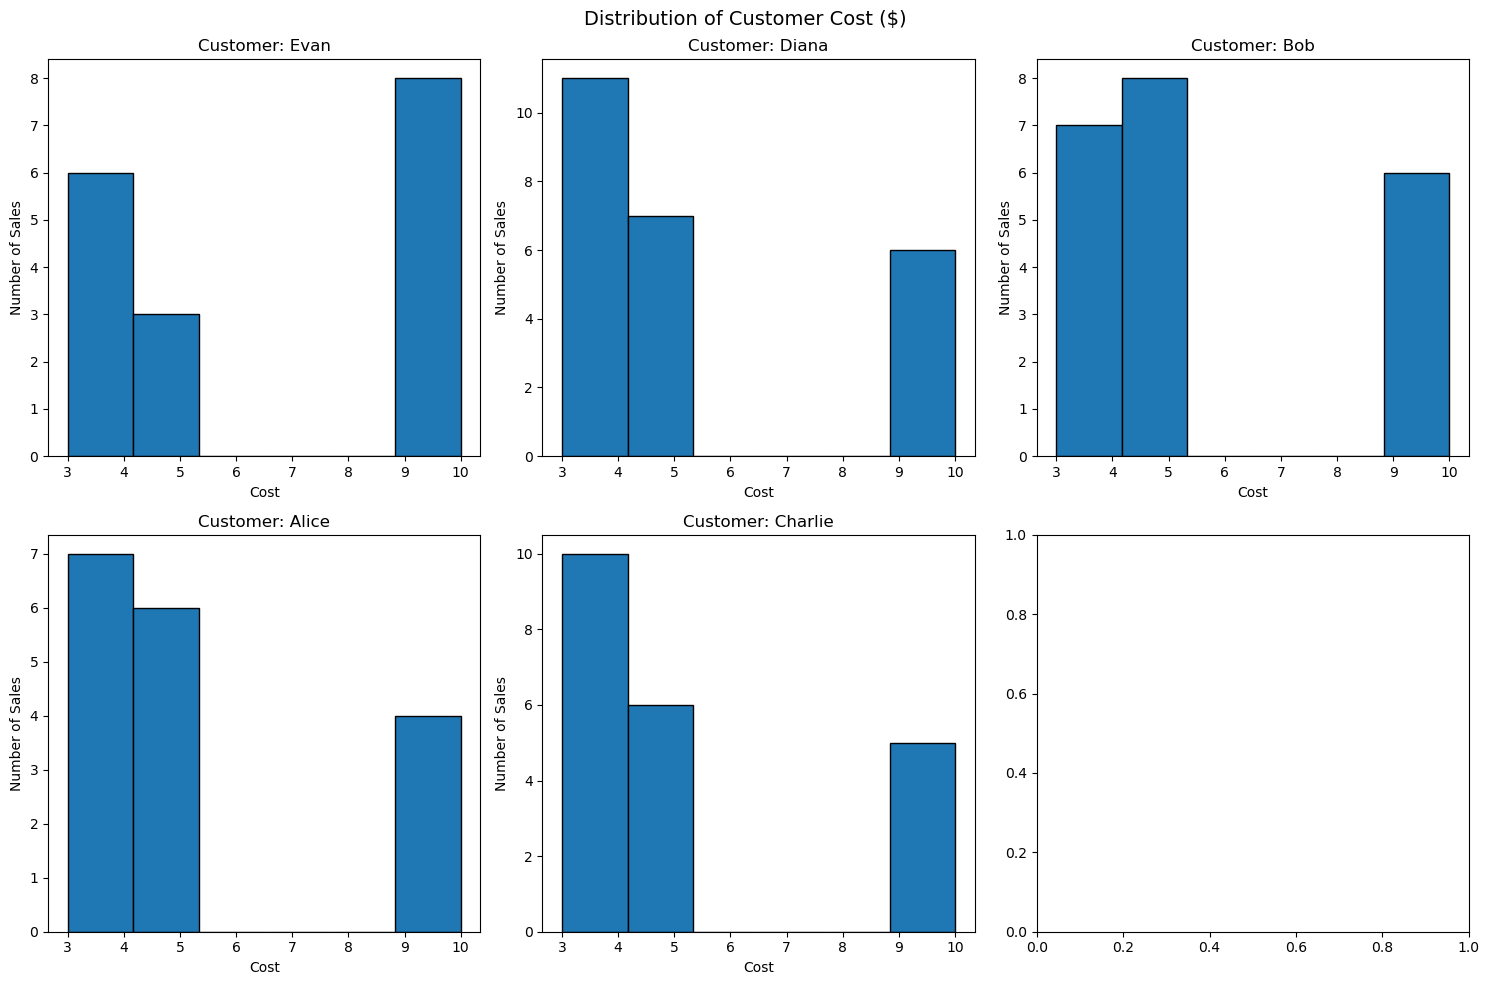

In [18]:
# Get a list of unique customer names
customer_names = df['Customer Name'].unique()

# Define the number of rows and columns for the subplot grid (adjust as needed)
rows = 2
cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size for readability

# Counter to track current subplot position
plot_counter = 0

# Iterate through customer names
for customer in customer_names:
  customer_data = df[df['Customer Name'] == customer]  # Filter data for each customer

  # Create the histogram for the current customer in the next available subplot
  axes[plot_counter // cols, plot_counter % cols].hist(customer_data['Cost ($)'], bins='auto', edgecolor='black')
  axes[plot_counter // cols, plot_counter % cols].set_title(f'Customer: {customer}')
  axes[plot_counter // cols, plot_counter % cols].set_xlabel('Cost')
  axes[plot_counter // cols, plot_counter % cols].set_ylabel('Number of Sales')

  # Increment counter for the next subplot
  plot_counter += 1

# Adjust layout (optional)
fig.suptitle('Distribution of Customer Cost ($)', fontsize=14)
plt.tight_layout()

# Display the histograms
plt.show()

#### Daily Sales Trend Analysis

Having explored customer cost distribution, let's shift our focus to understanding how sales fluctuate over time. This analysis will provide valuable insights into potential seasonal trends, peak sales periods, or any other patterns in daily sales figures.

To achieve this, we'll calculate the total sales amount for each day within our DataFrame `df`. We'll achieve this by grouping the data by the 'Sale Date' (assuming that's your date column name) and then summing the 'Cost $' column (replace with your actual sales column if different) using `groupby` and `sum`. Following the calculation, we'll create a line plot to visualize the daily sales trend. The line plot will depict how total sales change across different dates, allowing us to identify any recurring patterns or anomalies.

The following code snippet demonstrates this analysis. It calculates daily sales, creates a line plot, and configures the plot for readability.


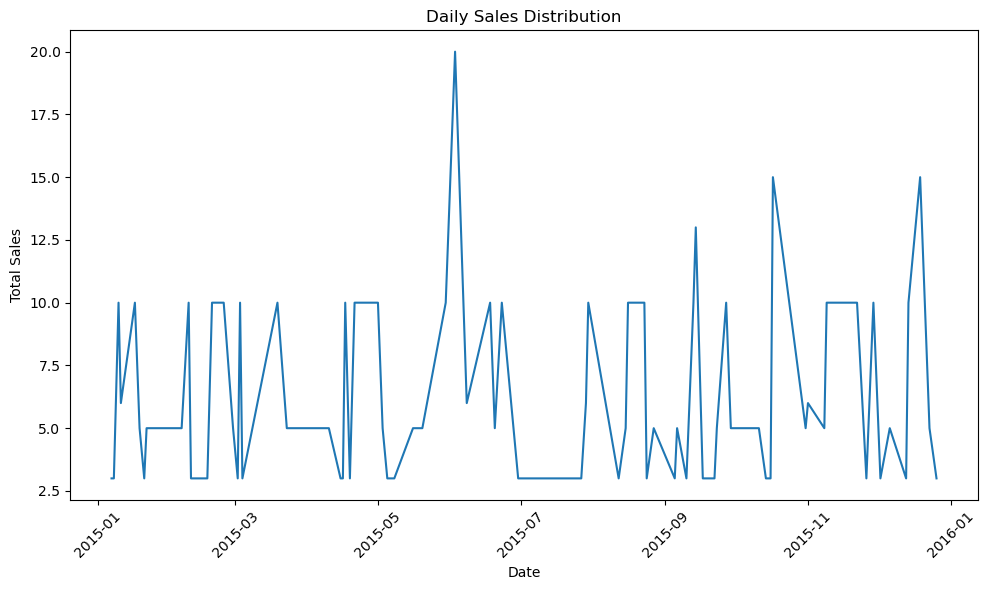

In [22]:
# Calculate daily sales
daily_sales = df.groupby('Sale Date')['Cost ($)'].sum()  # Replace 'Cost' with your sales column if different

# Create the lineplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Distribution')

# Optional: Customize plot (gridlines, date formatting)
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability with many dates
plt.tight_layout()

# Display the lineplot
plt.show()

#### Saving the DataFrame for Further Analysis

Throughout our analysis, we've explored and visualized various aspects of our data. To preserve the processed data for future reference or potential use in other tools, we'll save the DataFrame `df` as a CSV file.

CSV (Comma-Separated Values) is a widely used and versatile file format for storing tabular data. Saving our DataFrame as a CSV allows us to easily access and utilize the data in various spreadsheet applications or other programming languages that support CSV file handling.

The following code snippet demonstrates how to save the DataFrame to a CSV file. It specifies the desired file path (`/Users/<Name>/Desktop/RandoS.csv`) and sets the `index` parameter to `False` to avoid saving the row indices in the CSV file (you can adjust the file path as needed).

By saving the DataFrame as a CSV, you'll have a readily accessible copy of your processed data for future exploration or sharing with others.


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('/Users/<User_Name>/Desktop/RandoS.csv', index=False)